# CAPSTONE: Chicago Crime Stats Data Wrangling/Cleaning and Basic EDA

**Author: Darius Smith**

**BrainStation | Data Science | April 11, 2023**

## Table of Contents

[Data Information](#Dataset-Information)

[Data Dictionary](#Data-Dictionary)

[Initial Observations](#Initial-Observations)

[Data Preparation Plan](#Data-Preparation-Plan)

[Null Values](#Null-Values)

[Understanding the Data](#Understanding-the-Data)

[Conclusion](#Conclusion)

## Dataset Information

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. 

In this notebook, I will record intial observations of the data, preparation plan to clean the data, and some basic exploratory data analysis. 

## Data Dictionary  

Data about *WHERE* incidents occured: 

- **Block** - The partially redacted address where the incident occured, placing it on the same black as the actual address. (categorical) 

- **Location Description** - Description of the location where the incident occured. (categorical)

- **Beat** - Indicates the beat where the incident occured. A beat is the smallest geographic area - each beat has a dedicated police beat car. Three (3) to five (5) beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has (22) beats. (categorical) 

- **District** - Indicates the police district where the incident occured. (categorical) 

- **Ward** - The ward (City Council district) where the incident occured. (numerical) 

- **Community Area** - Indicates the community area where the incident occured. Chicago has (77) community areas. (categorical) 

- **X Coordinate** - The x coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Y Coordinate** - The y coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Latitude** - The latitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Longitude** - The longitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Location** - The location where the incident occured in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)



Data about *WHEN* incidents occured:


- **Date** - Date when the incident occured. (numerical)

- **Year** - Year the incident occured. (numerical)

- **ID** - Unique identifier for the record. (numerical) 

- **Case Number** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident. (categorical) 


Data about *WHAT* was the incident

- **IUCR** - The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. (categorical)

- **Primary Type** - The primary description of the IUCR code.(categorical) 

- **Description** - The secondary description of the IUCR code, a subcategory of the primary description. (categorical)

- **Domestic** - Indicates whether the incident was domestic related as defined by the Illinois Domestic Violence Act. (categorical) 

- **FBI Code** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). (categorical) 


Data about *CONSEQUENCES* of the incident
 
- **Arrest** - Indicates whether an arrest was made. (categorical) 


*WHEN* data was updated by the city of Chicago
 
- **Updated On** - Date and time the record was last updated. (numerical)

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data being viewed and viewing the first 5 rows. 
crime_df = pd.read_csv("Crimes_2001_to_Present.csv") 
crime_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#viewing the last 5 rows.
crime_df = pd.read_csv("Crimes_2001_to_Present.csv") 
crime_df.tail(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7742471,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,7.0,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
7742472,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,5.0,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
7742473,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,2.0,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
7742474,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,4.0,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"
7742475,12935341,JF525383,12/20/2022 06:45:00 AM,027XX W ROOSEVELT RD,0810,THEFT,OVER $500,STREET,False,False,...,28.0,29.0,06,1158071.0,1894595.0,2022,01/03/2023 03:46:28 PM,41.866517,-87.695179,"(41.866517317, -87.695178701)"


In [4]:
#Looking at the shape of the data; rows and columns. 
crime_df.shape

(7742476, 22)

## Initial Observations

- There are (4) datatypes:

    - (2) booleans
    - (7) float64
    - (3) int64
    - (10) objects/strings
    
    
- There are NaN values in the 'Location Description', 'X coordinate', 'Y coordinate', 'Latitude', 'Longitude', and 'Location' columns.
- 'Date' and 'Year'columns are unorganized. Not in ascending or descending order. Also, both start 'date' and 'year' is 2015.  
- 'Arrest' and 'Domestic' are labeled either True or False. 
- 'Year' and 'Date' also seems to have the same data in them. - (year)
- Date is an object type, needs to be convereted to 'datetime' format.
- 'Location' is a combined 'X coordinate' and 'Y coordinate.' This may be redudant information. 
- 'Ward', 'Community', and 'X coordinate', 'Y coordinate', 'Latitude', 'Longitude', and 'Location' are floats. 
- 'District' seems to be missing from the date. Column is not available in the head. 

In [5]:
#EDA summary
print(f"Rows: {crime_df.shape[0]}")
print(f"Columns: {crime_df.shape[1]}")
print(f"Missing values: {crime_df.isna().sum().sum()}")
print(f"Duplicated rows: {crime_df.duplicated().sum()}")

Rows: 7742476
Columns: 22
Missing values: 1663647
Duplicated rows: 0


Our shape is reconfimed, however, we have null values in the data. 

## Data Preparation Plan

- Deal with null values appropiately.
- Convert 'Date' column to 'datetime' format. Take a look at the column data, and gather some intital insight.
- Observe what non-numerical data could be changed to numerical. 
- Check and see if the 'District' column exists. Gather some insight on column. 
- Pick a few numerical & a few categorical columns and determine what data they are storing and distribution.

First step, removing all of the duplicated rows in the data frame. 

### Dealing with Null Values in the Crime Dataset

- First step, get the sum of null values. 
- Second step, calculate the proportion of null values missing. 
- Third step, decide what to do with the values.

In [6]:
#Getting the sum of null values by column 
crime_df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10093
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Community Area          613476
FBI Code                     0
X Coordinate             85036
Y Coordinate             85036
Year                         0
Updated On                   0
Latitude                 85036
Longitude                85036
Location                 85036
dtype: int64

In [7]:
#Getting the total sum of null values
crime_df.isna().sum().sum()

1663647

In [8]:
#Calculating the proportion of nulls missing. 
crime_df.isna().mean().sort_values(ascending = False)*100

Ward                    7.941219
Community Area          7.923512
Location                1.098305
Longitude               1.098305
Latitude                1.098305
Y Coordinate            1.098305
X Coordinate            1.098305
Location Description    0.130359
District                0.000607
Case Number             0.000052
Domestic                0.000000
Beat                    0.000000
Arrest                  0.000000
Description             0.000000
FBI Code                0.000000
Primary Type            0.000000
IUCR                    0.000000
Year                    0.000000
Updated On              0.000000
Block                   0.000000
Date                    0.000000
ID                      0.000000
dtype: float64

## Null Values

**Intital Observations:**

- There are (10) columns with null values. 
- 'Ward' and 'Community Area' has the highest percentage of null values. 
- 'District' and 'Case Number' has the lowest percentage of null values.
- There are a total of 1,663,639 null values.
- X Coordinate, Y, Coordinate, Latitude, Longitude and Location are all missing the same values. 

**Options**

- Remove any row that has missing values 
- Take a look at the 'Ward' and 'Community Area' to see which values are null and seeing if it is possible to fill them using the Latitude and Longitude. Do the same for X, and Y Coordinate and Location. Look these up on a map. This would be more of a proper method. Mode, mean, and median cannot be used to impute latitude and longitude. 

The first step to dealing with our null values will be to take a look at the 'Ward' and 'Community Area' to see which values are null and seeing if it is possible to fill them using the Latitude and Longitude. 

In [9]:
#Taking a look at the 'Wards' that are null and comparing to the latitude and longitude that are not null. 
crime_df[(crime_df['Ward'].isna()) & (crime_df['Latitude'].notna() & crime_df['Longitude'].notna())]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
209818,1051,G526151,09/03/2001 09:00:00 PM,030XX S CALIFORNIA,0110,HOMICIDE,FIRST DEGREE MURDER,COUNTY JAIL,True,False,...,NaN,NaN,01A,0.0,0.0,2001,08/17/2015 03:03:40 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
919605,11499870,JB506270,09/22/2018 12:00:00 PM,065XX N HARLEM AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,NaN,10.0,26,1127377.0,1943106.0,2018,11/09/2018 04:06:58 PM,42.000208,-87.806768,"(42.000208379, -87.806767692)"
955299,1335507,G031173,01/15/2001 01:31:10 PM,004XX E 63 ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,NaN,NaN,14,1180499.0,1863302.0,2001,08/17/2015 03:03:40 PM,41.780160,-87.613806,"(41.78015993, -87.613806039)"
955300,1335508,G034406,01/16/2001 10:16:13 PM,0000X N DESPLAINES ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,NaN,06,1171971.0,1900292.0,2001,08/17/2015 03:03:40 PM,41.881855,-87.643983,"(41.881855403, -87.643982647)"
955301,1335510,G033594,01/16/2001 03:45:00 PM,001XX N WELLS ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,...,NaN,NaN,11,1174739.0,1901656.0,2001,08/17/2015 03:03:40 PM,41.885537,-87.633778,"(41.885536838, -87.633777871)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551188,12642864,JF174518,03/05/2022 12:00:00 AM,017XX W HOWARD ST,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,...,NaN,1.0,06,1163643.0,1950346.0,2022,01/03/2023 03:46:28 PM,42.019386,-87.673147,"(42.019385566, -87.673147017)"
7622315,12761006,JF317384,07/14/2022 11:12:00 AM,007XX W OHARE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,AIRPORT EXTERIOR - SECURE AREA,True,False,...,NaN,76.0,15,1094587.0,1945065.0,2022,01/03/2023 03:46:28 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
7648302,12794589,JF357286,08/15/2022 09:50:00 AM,017XX W HOWARD ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,1.0,08B,1163643.0,1950346.0,2022,01/03/2023 03:46:28 PM,42.019386,-87.673147,"(42.019385566, -87.673147017)"
7669540,12816101,JF382023,09/03/2022 06:45:00 PM,065XX N HARLEM AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,NaN,10.0,08A,1127377.0,1943043.0,2022,01/03/2023 03:46:28 PM,42.000036,-87.806769,"(42.000035501, -87.806769117)"


In [10]:
#Taking a look at the 'Community Area' that are null and comparing to the latitude and longitude that are not null. 
crime_df[(crime_df['Community Area'].isna()) & (crime_df['Latitude'].notna() & crime_df['Longitude'].notna())]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
209818,1051,G526151,09/03/2001 09:00:00 PM,030XX S CALIFORNIA,0110,HOMICIDE,FIRST DEGREE MURDER,COUNTY JAIL,True,False,...,NaN,NaN,01A,0.0,0.0,2001,08/17/2015 03:03:40 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
955299,1335507,G031173,01/15/2001 01:31:10 PM,004XX E 63 ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,NaN,NaN,14,1180499.0,1863302.0,2001,08/17/2015 03:03:40 PM,41.780160,-87.613806,"(41.78015993, -87.613806039)"
955300,1335508,G034406,01/16/2001 10:16:13 PM,0000X N DESPLAINES ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,NaN,06,1171971.0,1900292.0,2001,08/17/2015 03:03:40 PM,41.881855,-87.643983,"(41.881855403, -87.643982647)"
955301,1335510,G033594,01/16/2001 03:45:00 PM,001XX N WELLS ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,...,NaN,NaN,11,1174739.0,1901656.0,2001,08/17/2015 03:03:40 PM,41.885537,-87.633778,"(41.885536838, -87.633777871)"
955302,1335511,G025435,01/12/2001 06:10:00 PM,001XX N STATE ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,...,NaN,NaN,11,1176290.0,1901660.0,2001,08/17/2015 03:03:40 PM,41.885513,-87.628082,"(41.885512978, -87.628082243)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491561,2097413,HH328417,04/24/2002 03:00:00 PM,062XX S NATOMA AV,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,1133151.0,1862448.0,2002,02/28/2018 03:56:25 PM,41.778772,-87.787414,"(41.778772446, -87.787413809)"
7492191,2751,HK436240,06/17/2004 01:53:00 AM,049XX W 49TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,NaN,NaN,01A,1144013.0,1871683.0,2004,08/31/2022 04:51:30 PM,41.803919,-87.747361,"(41.803918678, -87.74736136)"
7515267,1415640,G114580,02/26/2001 07:00:00 PM,004XX N LARAMIE AV,2210,LIQUOR LAW VIOLATION,SELL / GIVE / DELIVER LIQUOR TO MINOR,TAVERN / LIQUOR STORE,True,False,...,NaN,NaN,22,1141665.0,1902434.0,2001,02/25/2023 03:44:55 PM,41.888347,-87.755214,"(41.888347402, -87.755213622)"
7517282,1850094,G686840,11/15/2001 12:15:00 AM,070XX S EAST END AV,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,APARTMENT,False,False,...,NaN,NaN,02,1188950.0,1858785.0,2001,10/01/2022 04:46:24 PM,41.767567,-87.582968,"(41.767566691, -87.58296829)"


In [11]:
#Seeing if Latitude, Longitude, X and Y Coordinate, and Location Description are all missing in the same rows. 
crime_df[(crime_df['X Coordinate'].isna()) & (crime_df['Y Coordinate'].isna() & crime_df['Latitude'].isna())]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
54,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
84,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
158,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741931,12939797,JG101752,12/22/2022 03:33:00 AM,052XX S MICHIGAN AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,OTHER (SPECIFY),False,False,...,3.0,40.0,11,NaN,NaN,2022,01/03/2023 03:56:06 PM,NaN,NaN,NaN
7741977,12503194,JE301272,07/14/2021 01:00:00 PM,100XX W OHARE ST,2091,NARCOTICS,FORFEIT PROPERTY,AIRPORT/AIRCRAFT,True,False,...,41.0,76.0,18,NaN,NaN,2021,01/03/2023 03:56:06 PM,NaN,NaN,NaN
7742010,12940140,JG102119,12/19/2022 10:00:00 PM,069XX S PAXTON AVE,0810,THEFT,OVER $500,STREET,False,False,...,5.0,43.0,06,NaN,NaN,2022,01/03/2023 03:56:06 PM,NaN,NaN,NaN
7742042,12535816,JE397489,10/04/2021 10:15:00 AM,033XX W FILLMORE ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,24.0,29.0,18,NaN,NaN,2021,01/03/2023 03:56:06 PM,NaN,NaN,NaN


### Null Value Insight 

An attempt to fill in the 'Ward' column and the 'Community Area' column was made by observing the 'Longitude' and 'Latitude' column. This attempt was made using (https://www.itilog.com/). However, it was observed that in the case of one instance for both 'Latitude' and 'Longitude', it was not located in the city of Chicago but rather in Missouri. It would be risky to fill in the wrong 'Ward' or 'Community Area' because will give us false and unreliable data/information. 

It was also observed that the null values for 'Latitude', 'Longitude', 'X and Y Coordinate', and 'Location' were all missing in the same rows. Given what I know now, I will drop the null values in the 'Ward', 'Community Area', 'Latitude', 'Longitude', 'X and Y Coordinate', and 'Location' columns. 

In [12]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Latitude'], how='all', inplace=True)

In [13]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Longitude'], how='all', inplace=True)

In [14]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['X Coordinate'], how='all', inplace=True)

In [15]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Y Coordinate'], how='all', inplace=True)

In [16]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Location'], how='all', inplace=True)

In [17]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Ward'], how='all', inplace=True)

In [18]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Community Area'], how='all', inplace=True)

In [19]:
#Doing the null report to examine if there are still any null values in the columns above.
#Sanity check 
crime_df.isna().sum()

ID                         0
Case Number                3
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    6428
Arrest                     0
Domestic                   0
Beat                       0
District                  47
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64

It is observed that the null values have been removed. Now moving forward with addressing the remaining null values in the 'District', 'Case Number', and 'Location Description' columns. In this case, since the null values in 'District' and 'Case Number' are less than 0.2%, I will drop them from the data frame. However, since 'Location Description' is categorical, it will be filled in with 'Unknown.'

In [20]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['District'], how='all', inplace=True)

In [21]:
#Dropping the nulls in the column. 
crime_df.dropna(subset=['Case Number'], how='all', inplace=True)

In [22]:
#Sanity check 
crime_df.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    6428
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64

'Location Description' is our last column with remaining null values. As was mentioned previously, since'Location Description'is an object datatype. Null values will be put into an unknown category.

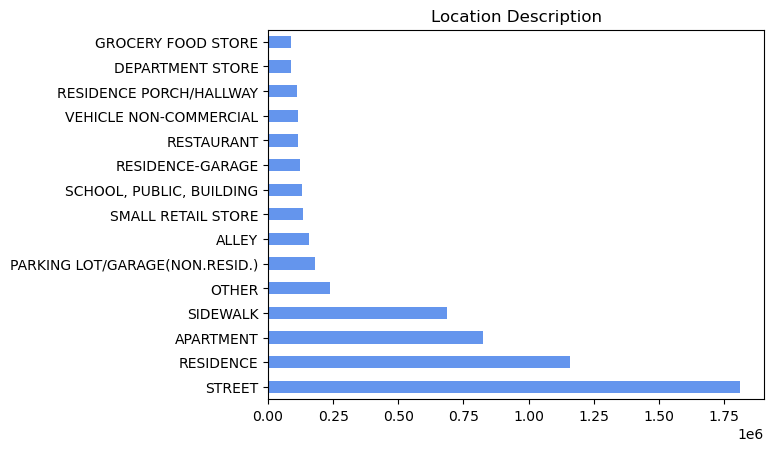

In [23]:
for col in ['Location Description']:
    
    plt.figure()
    crime_df[col].value_counts()[:15].plot(kind = 'barh',title = col, color = 'cornflowerblue')
    plt.show()

In [24]:
#Put the nulls into an unknown category for 'Location Description'

for col in ['Location Description']:
    
    crime_df[col].fillna('unknown',inplace = True)

In [25]:
#Sanity check/#Checking the sum of null values in the dataframe.
crime_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

**In Summary**

1. Columns were checked for duplicate data.
2. Null values were dealt with appropiately either being removed or by an imputation method. 

Next steps, data exploration and analysis, specifically:

- Convert 'Date' column to 'datetime' format. Take a look at the column data, and gather some intital insight. 
- Pick a few numerical & a few categorical columns and determine what data they are storing and distribution.
- Analyze patterns and trends within the columns. 

In [26]:
#'Date' is an object. Will be converting this to 'datetime' format.
crime_df['Date'].unique()

array(['09/05/2015 01:30:00 PM', '09/04/2015 11:30:00 AM',
       '09/05/2015 12:45:00 PM', ..., '12/23/2022 08:41:00 AM',
       '06/27/2022 10:05:00 AM', '12/20/2022 06:45:00 AM'], dtype=object)

In [27]:
# Converting 'Date' column to datatime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

In [28]:
#Sanity Check 
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7050667 entries, 0 to 7742475
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [29]:
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [30]:
#Gaining information on the columnn.
crime_df['Date']

0         2015-09-05 13:30:00
1         2015-09-04 11:30:00
3         2015-09-05 12:45:00
4         2015-09-05 13:00:00
5         2015-09-05 10:55:00
                  ...        
7742471   2022-06-27 10:05:00
7742472   2022-12-22 18:00:00
7742473   2022-12-26 22:30:00
7742474   2022-12-19 14:00:00
7742475   2022-12-20 06:45:00
Name: Date, Length: 7050667, dtype: datetime64[ns]

In [31]:
crime_df['Date'].value_counts()

2007-01-01 00:01:00    172
2008-01-01 00:01:00    166
2012-01-01 00:01:00    156
2007-01-01 00:00:00    145
2003-01-01 00:00:00    140
                      ... 
2005-12-13 13:14:27      1
2005-12-13 13:05:00      1
2005-12-13 21:33:26      1
2005-12-14 18:23:57      1
2022-12-20 06:45:00      1
Name: Date, Length: 2917498, dtype: int64

**Initial observation looking at the value counts of 'Date', it is clear that New Year's Eve/Day in the morning hours sees a high amount of incidents between the years of (2003 - 2012).** 

## Understanding the Data

Looking at the (numerical columns) of 'Year','Ward', and 'Community Area' as well the (categorical columns) of 'Domestic', 'Arrest', and 'Location Description.'

**The Objective** - 

- Gain insights on how the data is distributed and what information they are telling.
- Gain an understanding of any patterns or trends that may be occuring. 
- Starting with the numerical first and then digging into the categorical. 


- 'Year'- (Year the incident test occured.)
- 'Community Area'- (Indicates the community area where the incident occured.)
- 'Ward'- (Week that the WNV test is performed.)
- 'Domestic'- (Indicates whether the incident was domestic related as defined by the Illinois Domestic Violence Act.)
- 'Arrest'- (Indicates whether an arrest was made.)
- 'Location Description' - (Description of the location where the incident occured.)

In [32]:
#Gaining information on the column. 
crime_df['Year']

0          2015
1          2015
3          2015
4          2015
5          2015
           ... 
7742471    2022
7742472    2022
7742473    2022
7742474    2022
7742475    2022
Name: Year, Length: 7050667, dtype: int64

In [33]:
#Gaining information on how many incidents occured in the 'Year.'
#Incidents occured in descending order from year.
crime_df['Year'].value_counts().sort_index()

2001      3888
2002    345029
2003    471997
2004    467137
2005    449870
2006    445503
2007    435535
2008    419794
2009    385851
2010    369810
2011    351129
2012    335430
2013    306370
2014    273745
2015    257924
2016    267261
2017    264955
2018    263471
2019    259146
2020    208455
2021    202877
2022    233192
2023     32298
Name: Year, dtype: int64

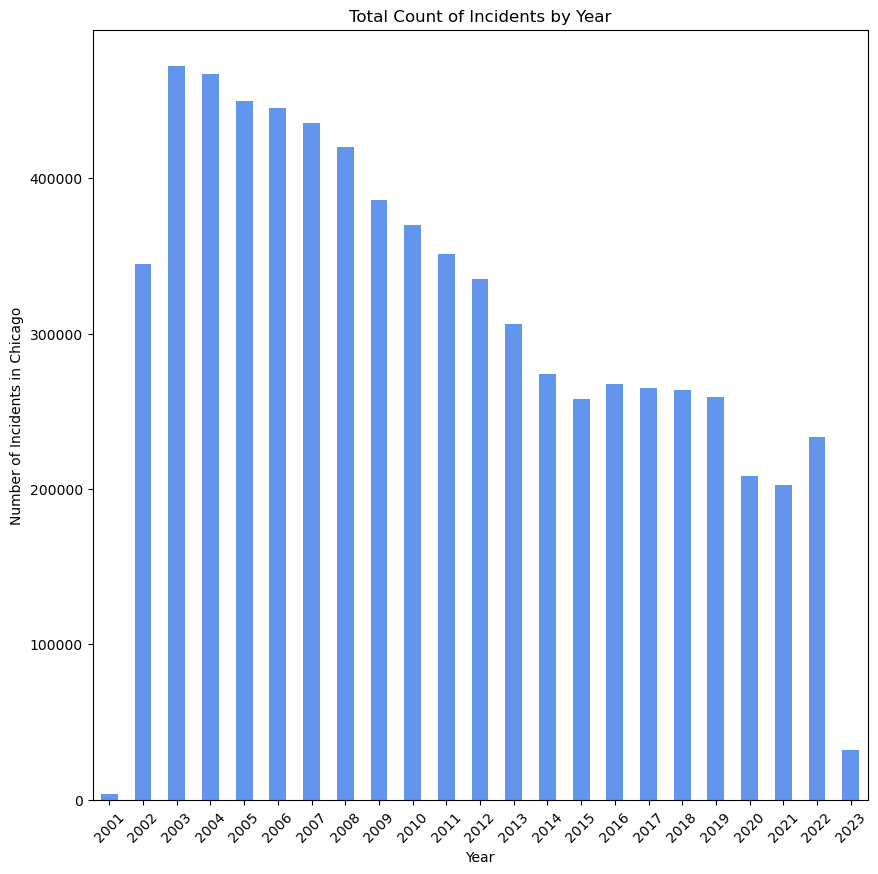

In [34]:
#Plotting a visualization for representation. 
plt.figure(figsize = (10,10))
crime_df['Year'].value_counts().sort_index().plot(kind='bar', color = 'cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Number of Incidents in Chicago')
plt.title('Total Count of Incidents by Year')
plt.xticks(rotation=45)
plt.show()

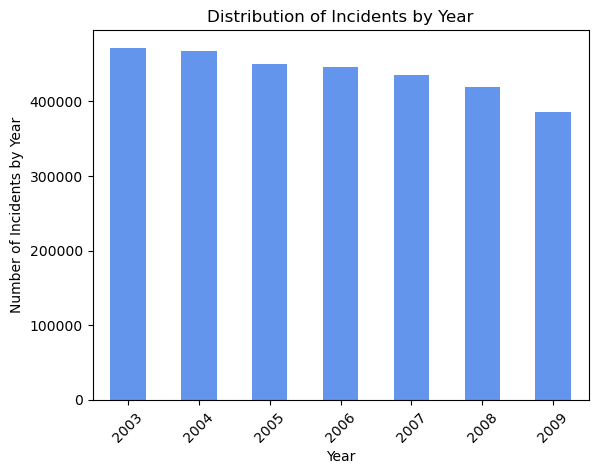

In [35]:
#Getting a visual representation of the column. 
#Picking the top 5 areas for visualization
crime_df['Year'].value_counts()[:7].plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents by Year')
plt.xticks(rotation=45)
plt.show()

## 'Year' Insights:

- 2003 saw the highest number of incidents with (**471,986**).
- 2001 saw the lowest number of incidents with (**3884**). I think this is inaccurate and leads to the question, when did they exactly begin recording crime incidents.
- There seems to be a downward trend in incidents after the year 2003.
- Between the years (**2015 - 2019**), incidents hovered between (**257,000**) - (**267,000**).
- There were (3) increases in incidents: 


    - (**2001**) - (**2002**) - saw an increase in yearly incidents. 
    - (**2002**) - (**2003**) - saw an increase in yearly incidents.
    - (**2015**) - (**2016**) - saw an increase in yearly incidents.
    - (**2021**) - (**2022**) - saw an increase in yearly incidents.

- After 2016, incidents decrease until the year 2022 where there is an increase.

In [36]:
#Gaining information on the columnn. 
crime_df['Ward']

0          12.0
1          29.0
3          35.0
4          28.0
5          21.0
           ... 
7742471    43.0
7742472    32.0
7742473    50.0
7742474    47.0
7742475    28.0
Name: Ward, Length: 7050667, dtype: float64

In [37]:
#Gaining information on how many incidents occured in the 'Ward.'
#Incidents occured in descending order from ward.
crime_df['Ward'].value_counts().sort_index()

1.0     134793
2.0     251268
3.0     215344
4.0     139777
5.0     169121
6.0     233545
7.0     191829
8.0     195078
9.0     182695
10.0    120085
11.0     96089
12.0     86038
13.0     86852
14.0     94878
15.0    183212
16.0    202965
17.0    233884
18.0    116480
19.0     62597
20.0    231717
21.0    213813
22.0     82326
23.0     89833
24.0    276306
25.0    102338
26.0    119563
27.0    264795
28.0    323166
29.0    164018
30.0     95989
31.0     96623
32.0    116215
33.0     69984
34.0    198095
35.0     92016
36.0     74267
37.0    190758
38.0     73611
39.0     66252
40.0     74607
41.0     73908
42.0    292585
43.0     88156
44.0     98193
45.0     72168
46.0     94674
47.0     73137
48.0     71183
49.0    100915
50.0     72926
Name: Ward, dtype: int64

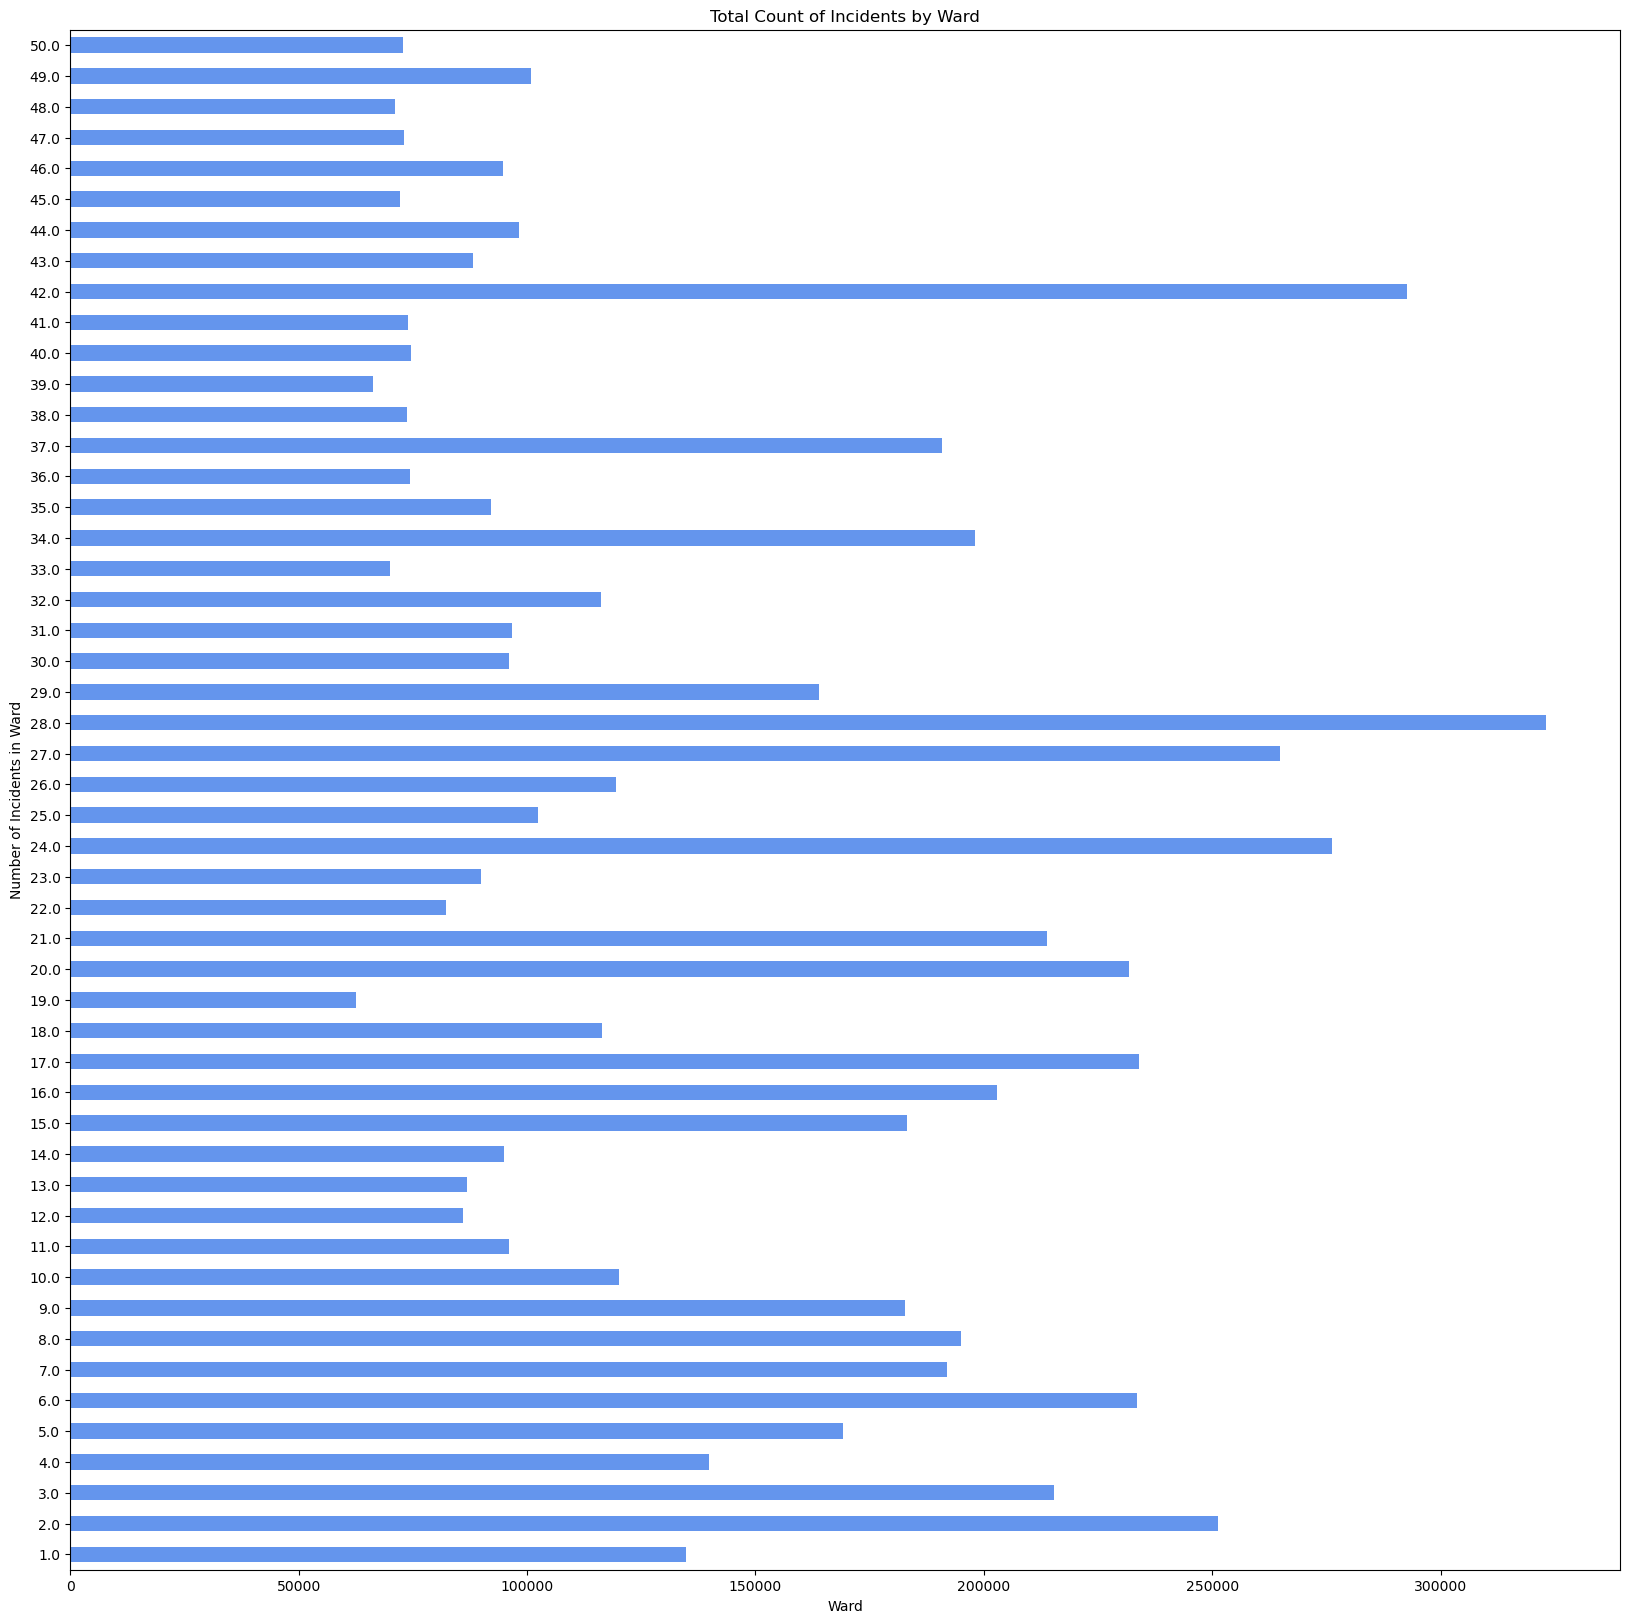

In [38]:
#Plotting a visualization for representation. 
plt.figure(figsize = (20,20))
crime_df['Ward'].value_counts().sort_index().plot(kind='barh', color = 'cornflowerblue')
plt.xlabel('Ward')
plt.ylabel('Number of Incidents in Ward')
plt.title('Total Count of Incidents by Ward')
plt.xticks(rotation=0)
plt.show()

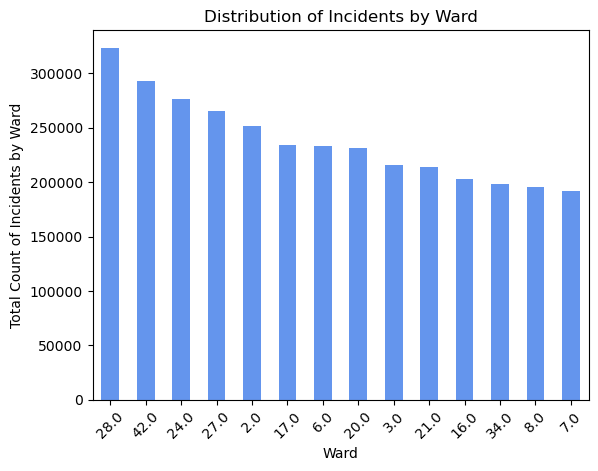

In [39]:
#Visualizing top 5 incidents by ward.
crime_df['Ward'].value_counts()[:7].plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Incidents by Ward')
plt.xlabel('Ward')
plt.ylabel('Total Count of Incidents by Ward')
plt.xticks(rotation=45)
plt.show()

## 'Ward' Insights: 

- Ward 28 has the highest number of incidents with (**323,160**)
- Ward 19 has the lowest number of incidents with (**62,594**).
- Of the (**50**) wards in Chicago, only (**23**) have 5-digit incidents. That is **46%** of the wards. 
- Ward 28 is the 'West Garfield Park' neighborhood. Located in the city's 'west side.'
- Ward 19 is the 'Beverly'or 'Beverly Hills' neighborhood. It is located in the city's far 'south side.' 

In [40]:
#Gaining information on the columnn. 
crime_df['Community Area']

0          61.0
1          25.0
3          21.0
4          25.0
5          71.0
           ... 
7742471     7.0
7742472     5.0
7742473     2.0
7742474     4.0
7742475    29.0
Name: Community Area, Length: 7050667, dtype: float64

In [41]:
crime_df['Community Area'].value_counts()

25.0    441880
8.0     247715
43.0    233095
23.0    220463
28.0    212586
         ...  
55.0     15597
12.0     13084
47.0     10581
9.0       6972
0.0         67
Name: Community Area, Length: 78, dtype: int64

In [42]:
#Gaining information on how many incidents occured in the 'Community Area'
#Incidents occured in descending order from community area.
crime_df['Community Area'].value_counts().sort_index()

0.0         67
1.0     108629
2.0      90186
3.0     103113
4.0      50415
         ...  
73.0     84058
74.0     15850
75.0     56300
76.0     39593
77.0     70462
Name: Community Area, Length: 78, dtype: int64

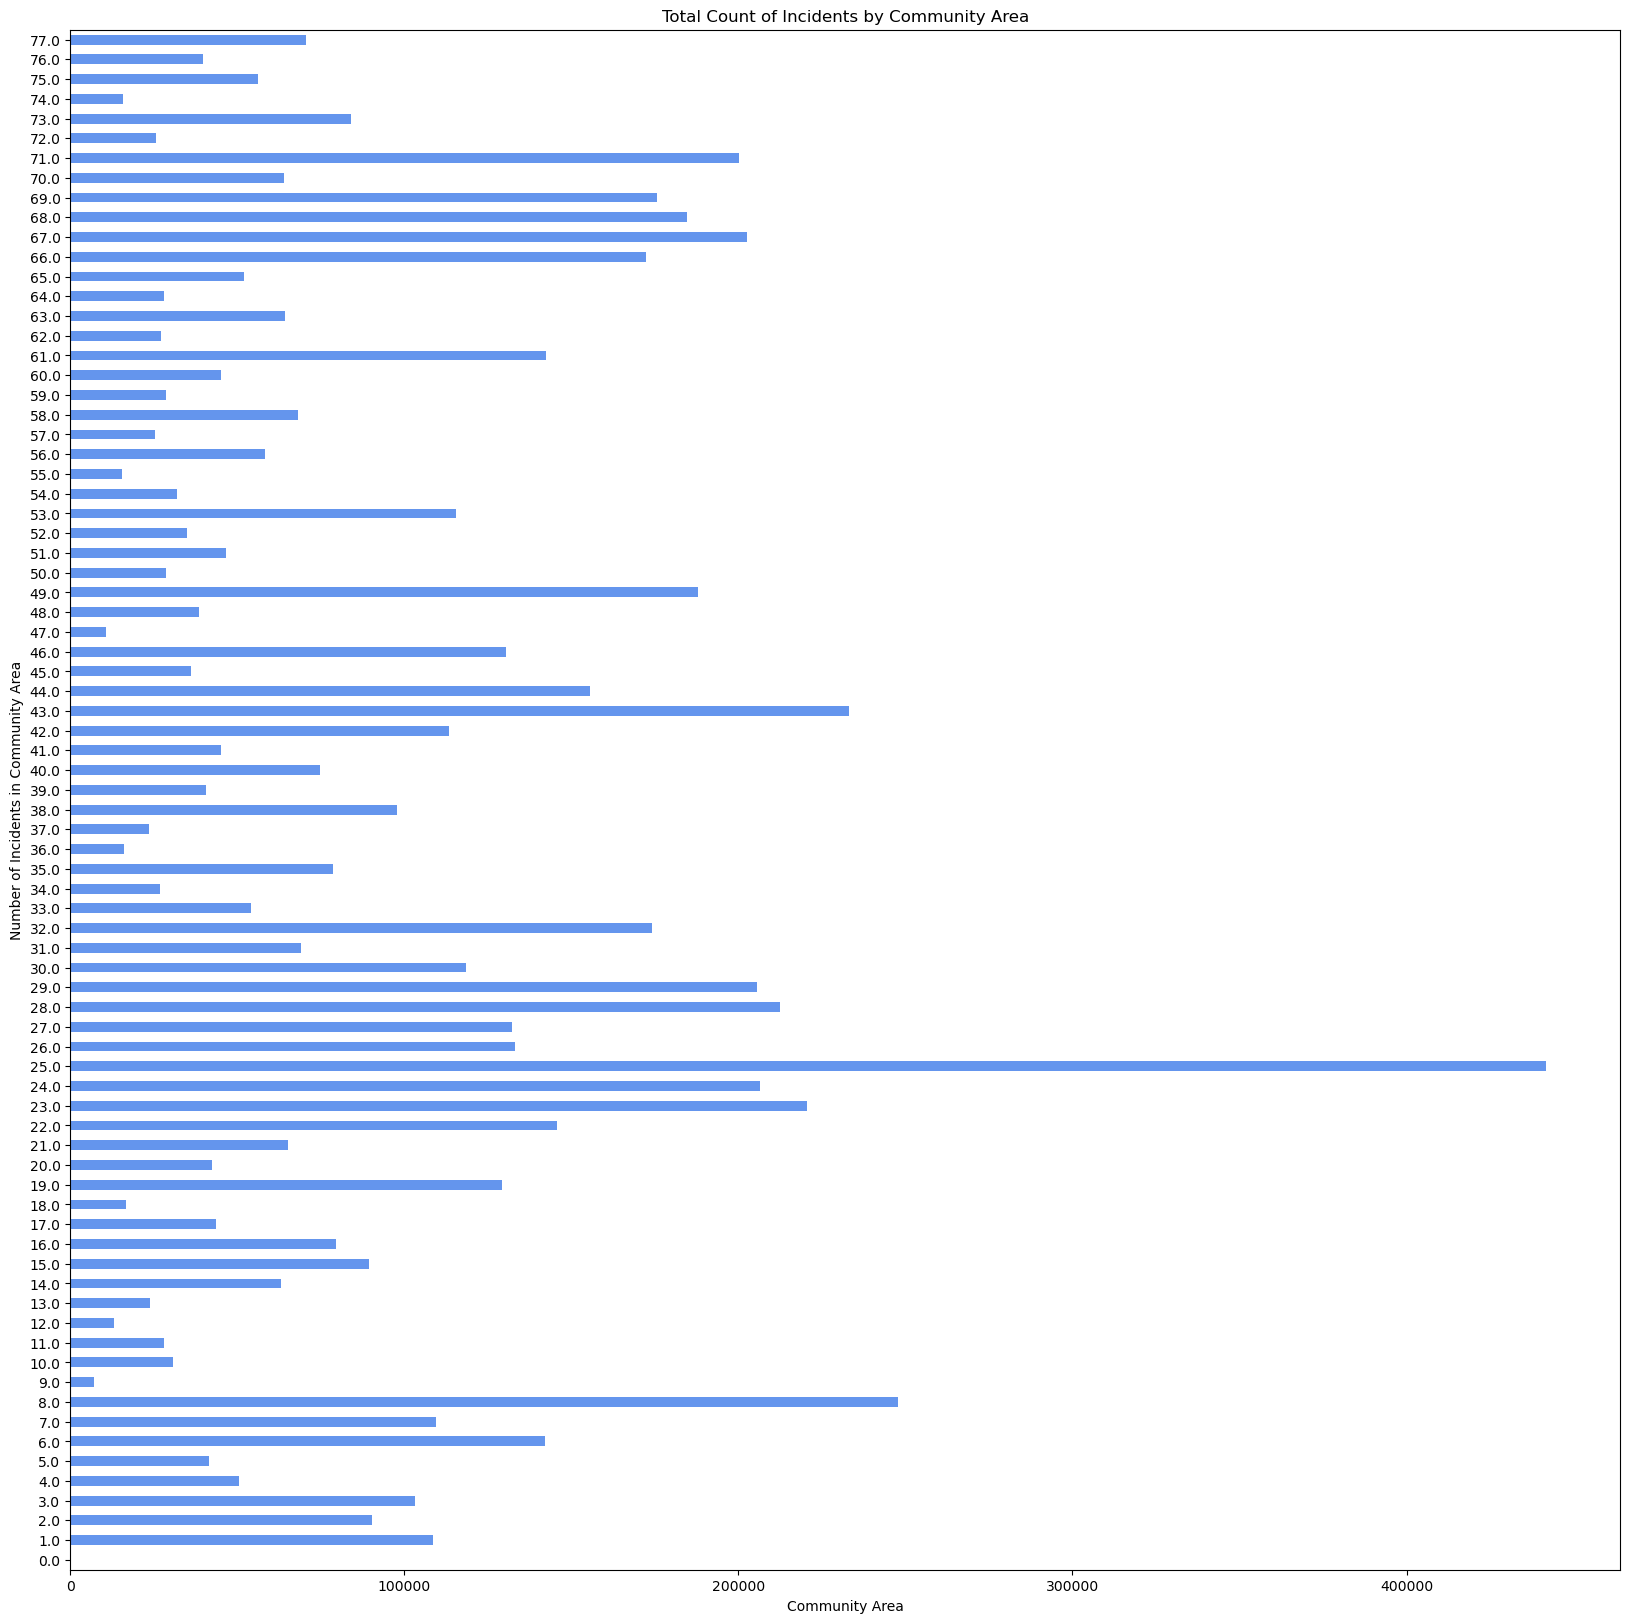

In [43]:
#Plotting a visual for representation
plt.figure(figsize = (20,20))
crime_df['Community Area'].value_counts().sort_index().plot(kind='barh', color = 'cornflowerblue')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents in Community Area')
plt.title('Total Count of Incidents by Community Area')
plt.xticks(rotation=0)
plt.show()

## 'Community Area' Insights: 

- Community Area 25 has the highest number of incidents with (**441,873**).
- Community Area 9 has the lowest number of incidents with (**6,972**).
- The community areas with the highest incidents are areas, **25, 8, 43, 23, and 28.**
- The community areas with the lowest incidents are areas, **55, 12, 47, and 9.**
- Community Area 25 is the 'Austin' neighborhood. Located in the city's 'west side.'
- Community Area 9 is the 'Edison Park' neighborhood. It is located in the city's 'north side.' 

In [44]:
#Gaining information on the columnn.
crime_df['Domestic']

0           True
1          False
3          False
4           True
5          False
           ...  
7742471    False
7742472    False
7742473    False
7742474    False
7742475    False
Name: Domestic, Length: 7050667, dtype: bool

In [45]:
#Gaining information on how many incidents occured that were 'Domestic'
#Incidents are either are True or False
crime_df['Domestic'].value_counts()

False    6064118
True      986549
Name: Domestic, dtype: int64

In [46]:
crime_df['Domestic'].value_counts()/crime_df.shape[0]*100

False    86.007721
True     13.992279
Name: Domestic, dtype: float64

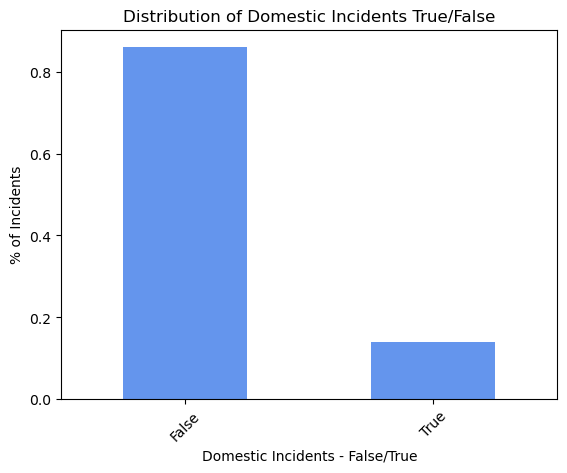

In [47]:
crime_df['Domestic'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Domestic Incidents True/False')
plt.xlabel('Domestic Incidents - False/True')
plt.ylabel('% of Incidents')
plt.xticks(rotation=45)
plt.show()

## 'Domestic' Insights: 

- There are (**6,063,978**) incidents that are not 'Domestic.'
- There are (**986,534**) incidents that are 'Domestic.'
- Incidents that were not 'Domestic' are **86%** of total incidents.
- Incidents that were 'Domestic' are **14%** of total incidents.
- This may mean that more incidents occur outside than at home. 
- This may also mean that the Illinois Domestic Violence Act may have impact. 
- There is a large data imbalance here. 

In [48]:
#Gaining information on the columnn.
crime_df['Arrest']

0          False
1          False
3           True
4          False
5          False
           ...  
7742471    False
7742472    False
7742473    False
7742474    False
7742475    False
Name: Arrest, Length: 7050667, dtype: bool

In [49]:
#Gaining information on how many incidents occured that were involved an 'Arrest'
#Incidents are either are True or False
crime_df['Arrest'].value_counts()

False    5221973
True     1828694
Name: Arrest, dtype: int64

In [50]:
crime_df['Arrest'].value_counts()/crime_df.shape[0]*100

False    74.063532
True     25.936468
Name: Arrest, dtype: float64

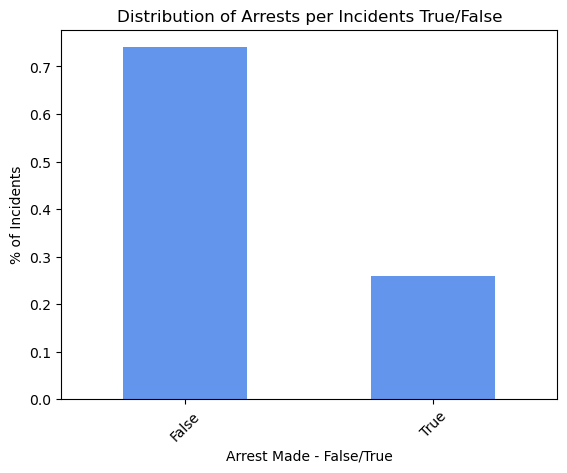

In [51]:
crime_df['Arrest'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Arrests per Incidents True/False')
plt.xlabel('Arrest Made - False/True')
plt.ylabel('% of Incidents')
plt.xticks(rotation=45)
plt.show()

## 'Arrest' Insights: 

- There are (**5,221,926**) incidents where someone was not 'Arrested.'
- There are (**1,828,586**) incidents where someone was 'Arrested.'
- Incidents where someone was not 'Arrested' accounted for **74%** of total incidents.
- Incidents where someone was 'Arrested' accounted for **26%** of total incidents.
- There are far less arrests being made compared to the being made. 
- Question for consideration, 'How many repeat offenders are committing crimes and are not being arrested?' 'What impact does this have on communities?'

In [52]:
#Gaining information on the columnn.
crime_df['Location Description']

0                                       RESIDENCE
1                                         CTA BUS
3                                        SIDEWALK
4                                       APARTMENT
5                                       RESIDENCE
                            ...                  
7742471                                   unknown
7742472                                    STREET
7742473    PARKING LOT / GARAGE (NON RESIDENTIAL)
7742474                                 APARTMENT
7742475                                    STREET
Name: Location Description, Length: 7050667, dtype: object

In [53]:
#Gaining information on how many incidents occured that were involved an 'Arrest'
#Incidents are either are True or False
crime_df['Location Description'].value_counts()

STREET                   1813373
RESIDENCE                1160426
APARTMENT                 823995
SIDEWALK                  685413
OTHER                     239189
                          ...   
EXPRESSWAY EMBANKMENT          1
LAGOON                         1
POLICE FACILITY                1
POOLROOM                       1
LOADING DOCK                   1
Name: Location Description, Length: 216, dtype: int64

In [54]:
#There are over 215 locations for this column. 
#Looking at the top 15 locations where incidents occur.
crime_df['Location Description'].value_counts()[:15]

STREET                            1813373
RESIDENCE                         1160426
APARTMENT                          823995
SIDEWALK                           685413
OTHER                              239189
PARKING LOT/GARAGE(NON.RESID.)     181757
ALLEY                              157537
SMALL RETAIL STORE                 135488
SCHOOL, PUBLIC, BUILDING           131383
RESIDENCE-GARAGE                   122143
RESTAURANT                         116657
VEHICLE NON-COMMERCIAL             116217
RESIDENCE PORCH/HALLWAY            112272
DEPARTMENT STORE                    89224
GROCERY FOOD STORE                  87017
Name: Location Description, dtype: int64

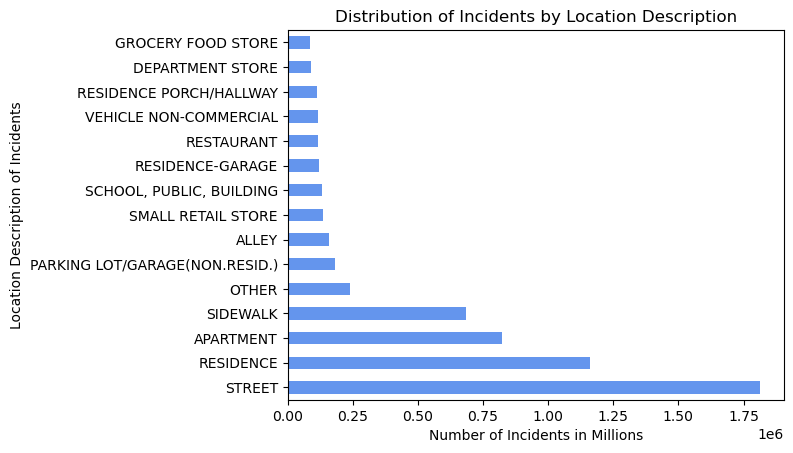

In [55]:
#Getting a visual representation of the column. 
#Picking the top 15 areas for visualization
crime_df['Location Description'].value_counts()[:15].plot(kind = 'barh',color = 'cornflowerblue')
plt.title('Distribution of Incidents by Location Description')
plt.xlabel('Number of Incidents in Millions')
plt.ylabel('Location Description of Incidents')
plt.show()

## 'Location Description' Insights: 

- The top (5) 'Location Descriptions' where incidents occured:
    
    - Street
    - Residence
    - Apartment
    - Sidewalk
    - Other
    
- There are (**1,813,335**) incidents that occured on the street.
- (**26%**) of incidents occur on the street. 
- The top (5) 'Location Descriptions' where incidents occured, accounted for **67%** of the total incidents.
- Incidents happen at home and outside the most.
- Residence and Apartment seem similar location wise. 
- Street and Sidewalk seem similar location wise. 

## Conclusion 

The purpose of this notebook was begin exploring the Chicago crime data, cleaning the data, and exploring the numerical and categorical columns within the data. In the cleaning of the data, it was observed that there were duplicated rows and null values. These were dealt with appropoiately before exploring the data.  

As far as intial analyzation with the numerical data and categorical data in the dataset, it was observed that:

**'Year' Insights:**

- 2003 saw the highest number of incidents with (**471,986**).
- 2001 saw the lowest number of incidents with (**3884**). I think this is inaccurate and leads to the question, when did they exactly begin recording crime incidents.
- There seems to be a downward trend in incidents after the year 2003.
- Between the years (2015 - 2019), incidents hovered between (**257,000**) - (**267,000**).
- There were (3) increases in incidents: 

    - (2001) - (2002) - saw an increase in yearly incidents. 
    - (2002) - (2003) - saw an increase in yearly incidents.
    - (2015) - (2016) - saw an increase in yearly incidents.
    - (2021) - (2022) - saw an increase in yearly incidents.


- After 2016, incidents decrease until the year 2022 where there is an increase.



**'Ward' Insights:** 

- Ward 28 has the highest number of incidents with (**323,160**)
- Ward 19 has the lowest number of incidents with (**62,594**).
- Of the (**50**) wards in Chicago, only (**23**) have 5-digit incidents. That is **46%** of the wards.  
- Ward 28 is the 'West Garfield Park' neighborhood. Located in the city's 'west side.'
- Ward 19 is the 'Beverly'or 'Beverly Hills' neighborhood. It is located in the city's far 'south side.' 


**'Community Area' Insights:** 

- Community Area 25 has the highest number of incidents with (**441,873**).
- Community Area 9 has the lowest number of incidents with (**6,972**).
- The community areas with the highest incidents are areas, **25, 8, 43, 23, and 28.**
- The community areas with the lowest incidents are areas, **55, 12, 47, and 9.**
- Community Area 25 is the 'Austin' neighborhood. Located in the city's 'west side.'
- Community Area 9 is the 'Edison Park' neighborhood. It is located in the city's 'north side.'


**'Domestic' Insights:** 

- There are (**6,673,298**) incidents that are not 'Domestic.'
- There are (**1,069,178**) incidents that are 'Domestic.'
- Incidents that were not 'Domestic' are **86%** of total incidents.
- Incidents that were 'Domestic' are **14%** of total incidents.
- This may mean that more incidents occur outside than at home. 
- This may also mean that the Illinois Domestic Violence Act may have impact. 


**'Arrest' Insights:** 

- There are (**5,221,926**) incidents where someone was not 'Arrested.'
- There are (**1,828,586**) incidents where someone was 'Arrested.'
- Incidents where someone was not 'Arrested' accounted for **74%** of total incidents.
- Incidents where someone was 'Arrested' accounted for **26%** of total incidents.
- There are far less arrests being made compared to the being made. 
- Question for consideration, 'How many repeat offenders are committing crimes and are not being arrested?' 'What impact does this have on communities?'


**'Location Description' Insights:** 

- The top (5) 'Location Descriptions' where incidents occured were in the street, residence, apartment, sidewalk,and other.
- There are (**1,813,335**) incidents that occured on the street.
- (**26%**) of incidents occur on the street. 
- The top (5) 'Location Descriptions' where incidents occured, accounted for **67%** of the total incidents.
- Incidents happen at home and outside the most.
- Residence and Apartment seem to be similar location wise. 
- Street and Sidewalk seem to be similar location wise.  

## Next Steps and Saving the Data

The next step of this data set will be to reduce the number of rows in the dataset by using the 'Year', and then save it as a 'csv' to explore relationships between the columns, and begin modeling. The exploration of relationships between the columns and modeling will be down in a new notebook.

In [56]:
#Setting up new 'csv' file.  
crime_df_decreased = crime_df.copy()

In [57]:
#Dictating what the 'Years' will be focused on for the dataset.
crime_df_decreased = crime_df[(crime_df['Year'] > 2015) & (crime_df['Year'] < 2020)]

Now that the dataset has been narrowed using the 'Year' column, we will check to see the new shape of the data.

In [58]:
#Looking at the shape of the new dataset that will be created.
crime_df_decreased.shape

(1054833, 22)

Below are the value counts as well as the 'Year' that will be focused on in the next notebook.

In [59]:
#Looking at value counts and for the years that will explored. 
crime_df_decreased['Year'].value_counts().sort_values()

2019    259146
2018    263471
2017    264955
2016    267261
Name: Year, dtype: int64

Lastly, how many rows were removed to create the new dataset.

In [60]:
#An observation of how many rows were removed. 
crime_df.shape[0] - crime_df_decreased.shape[0]

5995834

Creating the new dataset and saving as a 'csv'.

In [ ]:
#Creatiing new dataset.

crime_df_decreased.to_csv('Chicago_crime_clean_data.csv',index = False)